In [44]:
%autosave 60
import numpy as np
import keras
from keras.datasets import cifar10
from sklearn.decomposition import PCA
from sklearn import linear_model 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from keras.layers import Input, Dense
from keras.models import Model
import random
import matplotlib.pyplot as plt

Autosaving every 60 seconds


### import CIFAR-10 dataset

In [8]:
number_of_class = 10
# x_train: (50000, 32, 32, 3);  y_train: (50000, 1).
# x_test: (10000, 32, 32, 3); y_test: (10000, 1).
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255

### visualize CIFAR-10 images

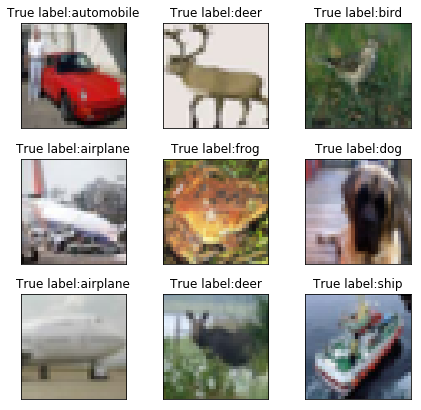

In [9]:
lst = [random.randint(0,50000) for i in range(9)]
dictionary = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)
for i in range(9):
    num = lst[i]
    plt.subplot(3, 3, i+1);
    plt.tight_layout()
    sample= x_train[num]
    sample_number=y_train[num][0]
    #sample_label = dictionary[sample_number]
    #image = np.reshape(sample,(32,32),order='F')
    plt.imshow(sample.transpose(1,2,0))
    plt.title("True label:{}".format(dictionary[sample_number]))
    plt.xticks([])
    plt.yticks([])
fig

In [10]:
x_train_reshape = x_train.reshape(50000, 3072)
x_test_reshape = x_test.reshape(10000, 3072)

### using PCA transformations with decreasing explained variance

In [11]:
%%time
pca_90 = PCA(n_components = 0.9)
x_train_pca_90 = pca_90.fit_transform(x_train_reshape)
print("The dimensionality is reduced to {} for 90% explained variance".format(pca_90.n_components_))
reduced_x_train_90 = pca_90.inverse_transform(x_train_pca_90)

pca_85 = PCA(n_components = 0.85)
x_train_pca_85 = pca_85.fit_transform(x_train_reshape)
print("The dimensionality is reduced to {} for 85% explained variance".format(pca_85.n_components_))
reduced_x_train_85 = pca_85.inverse_transform(x_train_pca_85)

The dimensionality is reduced to 99 for 90% explained variance
The dimensionality is reduced to 55 for 85% explained variance
CPU times: user 21min 33s, sys: 8min 58s, total: 30min 31s
Wall time: 1min 9s


In [18]:
print(np.shape(x_train_pca_90))
print(np.shape(x_train_pca_85))

(50000, 99)
(50000, 55)


### plot the images before/after PCA transformation

The true label is truck


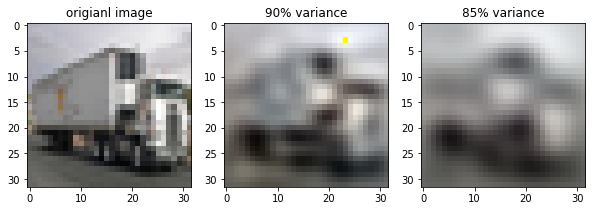

In [14]:
num = random.randint(0,50000)
label_index = y_train[num][0]
label_lst = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print("The true label is", label_lst[label_index])

fig_1 = plt.figure()
fig_1.set_figheight(10)
fig_1.set_figwidth(10)

plt.subplot(1, 3, 1);
pic_1 = x_train[num].reshape(3,32,32)
plt.imshow(pic_1.transpose(1,2,0))
plt.title("origianl image")

plt.subplot(1, 3, 2);
pic_2 = reduced_x_train_90[num].reshape(3,32,32)
plt.imshow(pic_2.transpose(1,2,0))
plt.title("90% variance")


plt.subplot(1, 3, 3);
pic_3 = reduced_x_train_85[num].reshape(3,32,32)
plt.imshow(pic_3.transpose(1,2,0))
plt.title("85% variance")
plt.show()

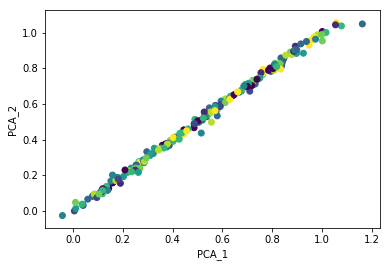

In [15]:
scatter_num = 200
random_lst = [random.randint(0,50000) for i in range(scatter_num)]
reduced_x_train_90_chosen = np.array([reduced_x_train_90[i] for i in random_lst])
y_train_chosen = [y_train[i] for i in random_lst]

plt.scatter(reduced_x_train_90_chosen[:, 0], reduced_x_train_90_chosen[:, 1], c=y_train_chosen)
plt.xlabel('PCA_1')
plt.ylabel('PCA_2')
plt.show()

### random forest with/without PCA

In [16]:
%%time
random_forest = RandomForestClassifier(n_estimators=10,bootstrap=True)
random_forest.fit(x_train_reshape, y_train)
rf_score = random_forest.score(x_test_reshape, y_test)
print("The accuracy of random forest on test data is",rf_score)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


The accuracy of random forest on test data is 0.3577
CPU times: user 22.9 s, sys: 190 ms, total: 23.1 s
Wall time: 23.1 s


In [21]:
%%time
x_test_pca_90 = pca_90.transform(x_test_reshape)
#use random forest after using pca to achieve dimensionality reduction
random_forest_pca_90 = RandomForestClassifier(n_estimators=10,bootstrap=True)
random_forest_pca_90.fit(x_train_pca_90, y_train)
rf_score_pca_90 = random_forest_pca_90.score(x_test_pca_90, y_test)
print("The accuracy of random forest after PCA transformation",rf_score_pca_90)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The accuracy of random forest after PCA transformation 0.3214
CPU times: user 9.22 s, sys: 4.41 s, total: 13.6 s
Wall time: 6.48 s


In [22]:
%%time
x_test_pca_85 = pca_85.transform(x_test_reshape)
#use random forest after using pca to achieve dimensionality reduction
random_forest_pca_85 = RandomForestClassifier(n_estimators=10,bootstrap=True)
random_forest_pca_85.fit(x_train_pca_85, y_train)
rf_score_pca_85 = random_forest_pca_85.score(x_test_pca_85, y_test)
print("The accuracy of random forest after PCA transformation",rf_score_pca_85)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


The accuracy of random forest after PCA transformation 0.3343
CPU times: user 6.96 s, sys: 4.28 s, total: 11.2 s
Wall time: 4.92 s


### SVM with/without PCA

In [42]:
%%time
# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier.fit(x_train_reshape,y_train)
svm_score = classifier.score(x_test_reshape, y_test)
print(svm_score)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4836
CPU times: user 4h 24min 50s, sys: 17.4 s, total: 4h 25min 8s
Wall time: 4h 24min 58s


In [40]:
%%time
x_test_pca_90 = pca_90.transform(x_test)
classifier_pca_90 = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier_pca_90.fit(x_train_pca_90,y_train)
svm_score_90 = classifier_pca_90.score(x_test_pca_90, y_test)
print("The accuracy of svm after PCA transformation", svm_score_90)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of svm after PCA transformation 0.4714
CPU times: user 11min 21s, sys: 4.61 s, total: 11min 25s
Wall time: 11min 18s


In [41]:
%%time
x_test_pca_85 = pca_85.transform(x_test)
classifier_pca_85 = svm.SVC(gamma=0.001)
#fit to the trainin data
classifier_pca_85.fit(x_train_pca_85,y_train)
svm_score_85 = classifier_pca_85.score(x_test_pca_85, y_test)
print("The accuracy of svm after PCA transformation",svm_score_85)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of svm after PCA transformation 0.4552
CPU times: user 6min 36s, sys: 4.06 s, total: 6min 40s
Wall time: 6min 34s


### logistic regression

In [ ]:
%%time
#create logistic regression classifier using default value
logi_regr = LogisticRegression()
logi_regr.fit(x_train_reshape, y_train)
logi_score = logi_regr.score(x_test_reshape, y_test)
print(logi_score)

In [23]:
%%time
#create logistic regression classifier using default value
logi_regr_pca_90 = LogisticRegression()
logi_regr_pca_90.fit(x_train_pca_90, y_train)
logi_score_pca_90 = logi_regr_pca_90.score(x_test_pca_90, y_test)
print(logi_score_pca_90)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4006
CPU times: user 37.7 s, sys: 204 ms, total: 37.9 s
Wall time: 37.8 s


In [24]:
%%time
#create logistic regression classifier using default value
logi_regr_pca_85 = LogisticRegression()
logi_regr_pca_85.fit(x_train_pca_85, y_train)
logi_score_pca_85 = logi_regr_pca_85.score(x_test_pca_85, y_test)
print(logi_score_pca_85)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.3816
CPU times: user 17.4 s, sys: 2.06 s, total: 19.5 s
Wall time: 16.9 s


### LDA

In [ ]:
%%time
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_reshape, y_train)
lda_score = lda.score(x_test_reshape, y_test)
print("The accuracy of lda on for original data is",lda_score)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
%%time
lda_pca_90 = LinearDiscriminantAnalysis()
lda_pca_90.fit(x_train_pca_90, y_train)
lda_score_pca_90 = lda_pca_90.score(x_test_pca_90, y_test)
print("The accuracy of lda on for original data is",lda_score_pca_90)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of lda on for original data is 0.3989
CPU times: user 2.15 s, sys: 2.28 s, total: 4.43 s
Wall time: 764 ms


### Autoencoder

In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [4]:
#construct convolutional autoencoder
input_img = Input(shape=(3, 32, 32))
x = Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_conv = Model(input_img, decoded)
autoencoder_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3, 32, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 32, 32)       7168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 16, 16)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 16, 16)       295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 8, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 8, 8)         147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 128, 4, 4)         0         
__________

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train/255
x_test = x_test/255
autoencoder_conv.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder_conv.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50


/usr/local/src/incubator-mxnet/python/mxnet/module/bucketing_module.py:408: UserWarning: Optimizer created manually outside Module but rescale_grad is not normalized to 1.0/batch_size/num_workers (1.0 vs. 0.0078125). Is this intended?
  force_init=force_init)


50000/50000 [==============================] - 17s 348us/step - loss: 0.6910 - val_loss: 0.6911
Epoch 2/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.6906 - val_loss: 0.6906
Epoch 3/50
50000/50000 [==============================] - 13s 269us/step - loss: 0.6722 - val_loss: 0.6212
Epoch 4/50
50000/50000 [==============================] - 13s 270us/step - loss: 0.6191 - val_loss: 0.6133
Epoch 5/50
50000/50000 [==============================] - 14s 273us/step - loss: 0.6065 - val_loss: 0.6030
Epoch 6/50
50000/50000 [==============================] - 14s 273us/step - loss: 0.6006 - val_loss: 0.5947
Epoch 7/50
50000/50000 [==============================] - 14s 271us/step - loss: 0.5968 - val_loss: 0.5956
Epoch 8/50
50000/50000 [==============================] - 14s 270us/step - loss: 0.5938 - val_loss: 0.5910
Epoch 9/50
50000/50000 [==============================] - 14s 273us/step - loss: 0.5908 - val_loss: 0.5860
Epoch 10/50
50000/50000 [=======================

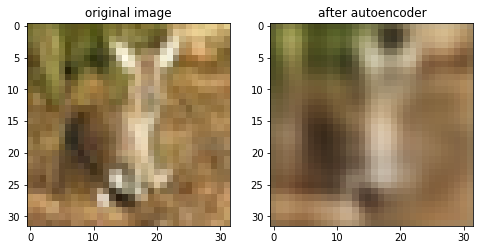

In [6]:
#encoded_test_imgs = encoder_model.predict(x_test)
decoded_test_conv_imgs = autoencoder_conv.predict(x_test)
decoded_train_conv_imgs = autoencoder_conv.predict(x_train)

random_idx = random.randint(0,10000)
#convert into the "channels_first" format
sample = x_test[random_idx].reshape(3, 32, 32)
sample_ae = decoded_test_conv_imgs[random_idx].reshape(3, 32, 32)

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(8)

plt.subplot(1, 2, 1);
plt.imshow(sample.transpose(1,2,0))
plt.title("original image")
plt.subplot(1, 2, 2);
plt.imshow(sample_ae.transpose(1,2,0), cmap = 'BrBG')
plt.title("after autoencoder")
plt.show()


In [51]:
decoded_train_conv_flatten = decoded_train_conv_imgs.reshape(50000, 3072)
decoded_test_conv_flatten = decoded_test_conv_imgs.reshape(10000, 3072)

In [52]:
%%time
random_forest_AE = RandomForestClassifier(n_estimators=10,bootstrap=True)
random_forest_AE.fit(decoded_train_conv_flatten, y_train)
rf_score_AE = random_forest.score(decoded_test_conv_flatten, y_test)
print("The accuracy of random forest on test data is",rf_score_AE)

/usr/lib/python3/dist-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


The accuracy of random forest on test data is 0.3692
CPU times: user 33.5 s, sys: 11.1 ms, total: 33.5 s
Wall time: 33.5 s


In [42]:
%%time
logi_regr_AE = LogisticRegression()
logi_regr_AE.fit(decoded_train_conv_flatten, y_train)
logi_score_AE = logi_regr_AE.score(decoded_test_conv_flatten, y_test)
print(logi_score_AE)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4451
CPU times: user 1h 42min 22s, sys: 19.2 s, total: 1h 42min 41s
Wall time: 1h 42min 37s


In [137]:
%%time
svm_classifier_AE = svm.SVC(gamma=0.001)
svm_classifier_AE.fit(decoded_train_conv_flatten,y_train)
svm_score_AE = svm_classifier_AE.score(decoded_test_conv_flatten, y_test)
print(svm_score_AE)

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.4759
CPU times: user 5h 32min 49s, sys: 11.1 s, total: 5h 33min
Wall time: 5h 37min 36s


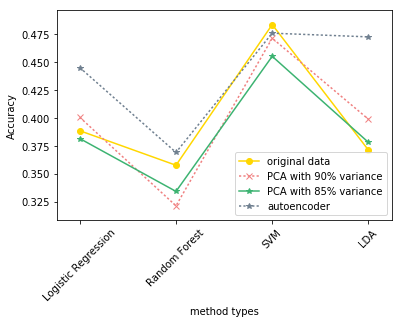

In [55]:
import matplotlib.pyplot as plt
names = ['Logistic Regression', 'Random Forest', 'SVM', 'LDA']
x = range(len(names))
original_data_acc = [0.3886, 0.3577, 0.4836,0.3713]
PCA_90_acc = [0.4006, 0.3214, 0.4714,0.3989]
PCA_85_acc = [0.3816, 0.3343, 0.4552, 0.3782]
autoencoder = [0.4451,0.3692,0.4759, 0.4726]

plt.plot(x, original_data_acc,color='gold',linestyle='-',marker='o',label='original data')
plt.plot(x,PCA_90_acc,color='lightcoral',linestyle=':',marker='x',label='PCA with 90% variance')
plt.plot(x,PCA_85_acc,color='mediumseagreen',linestyle='-',marker='*',label='PCA with 85% variance')
plt.plot(x,autoencoder,color='slategrey',linestyle=':',marker='*',label='autoencoder')

plt.xticks(x, names, rotation=45)
plt.margins(0.08)
plt.subplots_adjust(bottom=0.15)
plt.xlabel('method types')
plt.ylabel('Accuracy')
#plt.title('The plot of classification accuracies of other machine learning methods')
plt.legend()
plt.show()